In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("mpu9250_mov1.csv")
df.head()

,ax,ay,az,gx,gy,gz,mx,my,mz,target
0,0.857910,-0.056152,0.446777,-9.146341,-15.365854,-18.048780,-5.701426,-6.451613,-42.460617,0
1,0.935059,0.094238,0.385254,-7.743903,-18.231709,-0.731707,-7.651913,-5.551388,-39.609901,0
2,1.008789,-0.015137,-0.042480,-22.317074,15.670732,-2.073171,-9.902475,-3.600900,-36.309078,0
3,1.096191,-0.018555,0.059082,-15.121951,8.475610,2.012195,-7.051763,-4.351088,-32.858215,0
4,0.992676,-0.009277,0.036133,-6.402439,-3.475610,-5.426829,-9.452363,-4.501125,-31.357840,0


# SCALE

In [3]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(df.iloc[:,:-1])

StandardScaler()

In [ ]:
dfs = scaler.transform(df.iloc[:,:-1]).copy()
dfs

In [19]:
from sklearn.externals.joblib import dump, load

In [20]:
dump(scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

# TRAIN_SPLIT

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfs[:,:], df['target'], random_state=0)

# EDA

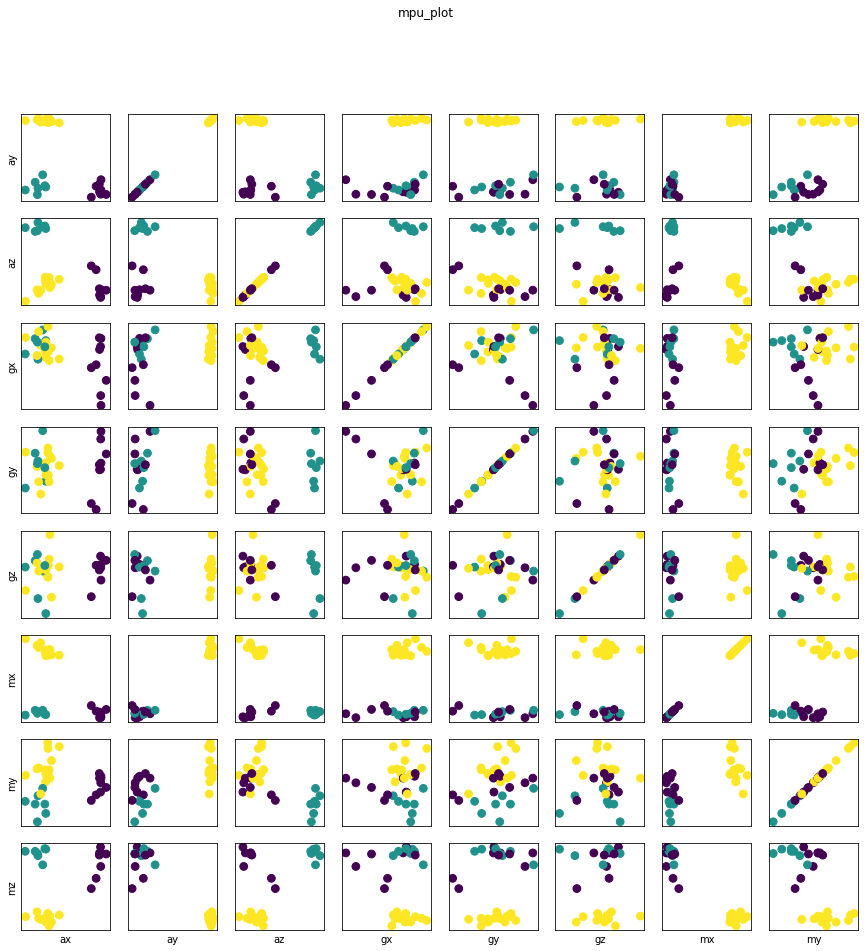

In [12]:
fig, ax = plt.subplots(8,8, figsize=(15,15))
plt.suptitle("mpu_plot")

for i in range(8):
    for j in range(8):
        ax[i,j].scatter(X_train[:,j], X_train[:,i+1], c=y_train,s=60)
        ax[i,j].set_xticks(())
        ax[i,j].set_yticks(())
        
        if i==7:
            ax[i,j].set_xlabel(df.columns[j])
        if j==0:
            ax[i,j].set_ylabel(df.columns[i+1])

# ML model

In [13]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [14]:
n_l_tr = []
n_l_ts = []

for n in range(1,10):
    knn = KNN(n_neighbors = n)
    knn.fit(X_train, y_train)
    knn_train = knn.score(X_train, y_train)
    n_l_tr.append(knn_train)
    knn_test =knn.score(X_test, y_test)
    n_l_ts.append(knn_test)
    print(f"neighbors: {n}, Entrenamiento: {knn_train}, test: {knn_test}")

neighbors: 1, Entrenamiento: 1.0, test: 1.0
neighbors: 2, Entrenamiento: 1.0, test: 1.0
neighbors: 3, Entrenamiento: 1.0, test: 1.0
neighbors: 4, Entrenamiento: 1.0, test: 1.0
neighbors: 5, Entrenamiento: 1.0, test: 1.0
neighbors: 6, Entrenamiento: 1.0, test: 1.0
neighbors: 7, Entrenamiento: 1.0, test: 1.0
neighbors: 8, Entrenamiento: 1.0, test: 1.0
neighbors: 9, Entrenamiento: 1.0, test: 1.0


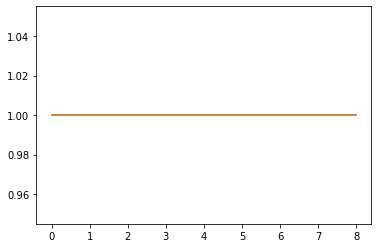

In [15]:
plt.plot(n_l_tr)
plt.plot(n_l_ts)

In [16]:
import pickle

In [17]:
"""
def knn_model(nn=3, new_data=np.array([[3,4,5]]):
    knn = KNN(n_neighbors = nn)
    knn.fit(X_train, y_train)
    predict = knn.predict(new_data)
"""
nn=3

knn = KNN(n_neighbors = nn)
knn.fit(X_train, y_train)

pickle.dump(knn, open("./knn_mpu9050.sav", "wb"))